## Import Libraries

In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [339]:
#import sk-learn libraries
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [751]:
# Preprocessing libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Load the datasets

In [752]:
feature_df = pd.read_csv('Credit_card.csv')
label_df = pd.read_csv('Credit_card_label.csv')

## Exploratory Data Analysis (EDA)
We'll inspect the datasets to understand their structure, identify missing values, and visualize the data.

In [753]:
df = pd.concat([feature_df, label_df['label']], axis=1)

In [754]:
#display the first few rows of the datasets
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [755]:
#summary statictics
df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [756]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [757]:
# shape of dataset
print(df.shape)

(1548, 19)


In [758]:
#checking class distribution
df1 = df[df['label']==0]
df2 = df[df['label']==1]

In [759]:
print(df1.shape)
print(df2.shape)

(1373, 19)
(175, 19)


Text(0.5, 1.0, 'not eligible(0) VS eligible(1)')

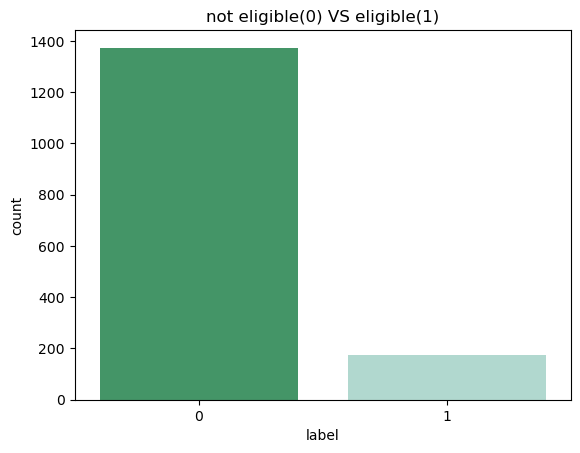

In [760]:
#visualizing class distribution within dataset
sns.countplot(x='label', data=df, palette='BuGn_r')
plt.title('not eligible(0) VS eligible(1)')

In [761]:
# check for missing values
print('Missing Values: ')
print(df.isnull().sum())

Missing Values: 
Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64


## Data Preprocessing

In [762]:
df.drop(['Phone','Birthday_count','Type_Occupation'] , axis=1,  inplace=True)

In [763]:
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Employed_days,Mobile_phone,Work_Phone,EMAIL_ID,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,365243,1,0,0,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-586,1,1,0,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-586,1,1,0,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-586,1,1,0,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-586,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-2182,1,0,0,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-1209,1,0,0,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-2477,1,0,0,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-645,1,1,0,2,0


In [764]:
numerical_features = ['Annual_income', 'Employed_days', 'Family_Members']
categorical_features = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type']

In [765]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [766]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [767]:
preprocessor = ColumnTransformer(
   transformers=[
       ('num', numerical_transformer, numerical_features),
       ('cat', categorical_transformer, categorical_features)
   ])

In [768]:
x = df.drop('label', axis=1)
y = df['label']

In [769]:
x_preprocessed = preprocessor.fit_transform(x)

In [770]:
x_preprocessed.shape

(1548, 29)

In [771]:
x_train, x_test, y_train, y_test = train_test_split(x_preprocessed, y, test_size=0.23, random_state=17, stratify=y)

In [772]:
# define the models

models = {
    'Logistic Regression' : LogisticRegression(),
    'XG Boost': XGBClassifier(),
    'Random Forest' : RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM' : SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

In [773]:
# train and evaluate each model 

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)*100
    model_performance.append([acc, report])
    print('\n', name, 'ACCURACY:', acc, '\n\n', classification_report(y_test, y_pred))
    
    


 Logistic Regression ACCURACY: 88.79551820728291 

               precision    recall  f1-score   support

           0       0.89      1.00      0.94       317
           1       0.00      0.00      0.00        40

    accuracy                           0.89       357
   macro avg       0.44      0.50      0.47       357
weighted avg       0.79      0.89      0.84       357


 XG Boost ACCURACY: 89.91596638655463 

               precision    recall  f1-score   support

           0       0.93      0.95      0.94       317
           1       0.56      0.47      0.51        40

    accuracy                           0.90       357
   macro avg       0.75      0.71      0.73       357
weighted avg       0.89      0.90      0.90       357


 Random Forest ACCURACY: 92.43697478991596 

               precision    recall  f1-score   support

           0       0.93      0.99      0.96       317
           1       0.81      0.42      0.56        40

    accuracy                           0

In [774]:
# I will use RandomForest Classifier for my classification task because it is giving
#good f1-score as comparable to other models
model = RandomForestClassifier(n_estimators=100, random_state=27)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=27)

In [775]:
pred = model.predict(x_test)
print(accuracy_score(pred, y_test))
print(classification_report(pred, y_test))

0.9327731092436975
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       335
           1       0.47      0.86      0.61        22

    accuracy                           0.93       357
   macro avg       0.73      0.90      0.79       357
weighted avg       0.96      0.93      0.94       357



In [776]:
import joblib

In [778]:
input_data = {
    'Annual_income': [50000],
    'Employed_days': [3650],
    'Family_Members': [3],
    'GENDER': ['Male'],
    'Car_Owner': ['Yes'],
    'Propert_Owner': ['No'],
    'Type_Income': ['Salaried'],
    'EDUCATION': ['Bachelor'],
    'Marital_status': ['Married'],
    'Housing_type': ['Owned']
}

In [779]:
input_features = pd.DataFrame(input_data)
input_features

,Annual_income,Employed_days,Family_Members,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type
0,50000,3650,3,Male,Yes,No,Salaried,Bachelor,Married,Owned


In [780]:
transformed_input_features = preprocessor.transform(input_features)
transformed_input_features

array([[-1.2545757 , -0.4044226 ,  0.88499406,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ]])

In [783]:
prediction = model.predict(transformed_input_features)

In [787]:
if prediction == 0:
    print('You are not Eligible for Credit Card')
else:
    print('You are Eligible for Credit Card')

You are not Eligible for Credit Card


In [788]:
joblib.dump(model, 'credit_card_eligibility_model.pkl')

['credit_card_eligibility_model.pkl']

In [789]:
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']